In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

FIGSIZE = (15, 15)

## Part 1: Types of Images & Color Spaces

### Load image `flowers.bmp` and display it

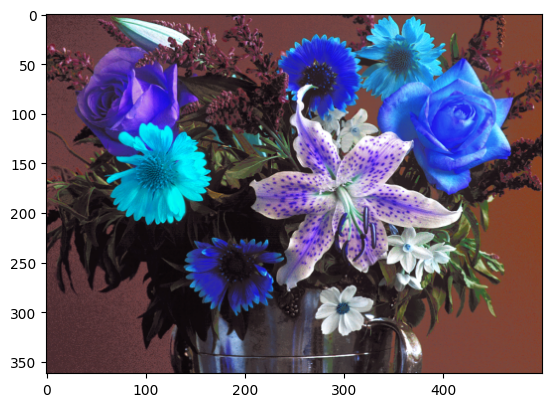

In [2]:
flowers = cv2.imread('flowers.bmp')
plt.imshow(flowers)

### Display image dimensions

In [3]:
flowers.shape

(362, 500, 3)

### Display the three channels (R, G, B) of the image separately
  
**Approacch 1**: iterating over the channels by index. **Note**: By defauld, the `imread()` function decodes the image into a matrix, with the color channels saved in the following order: **blue, green, red (BGR)**

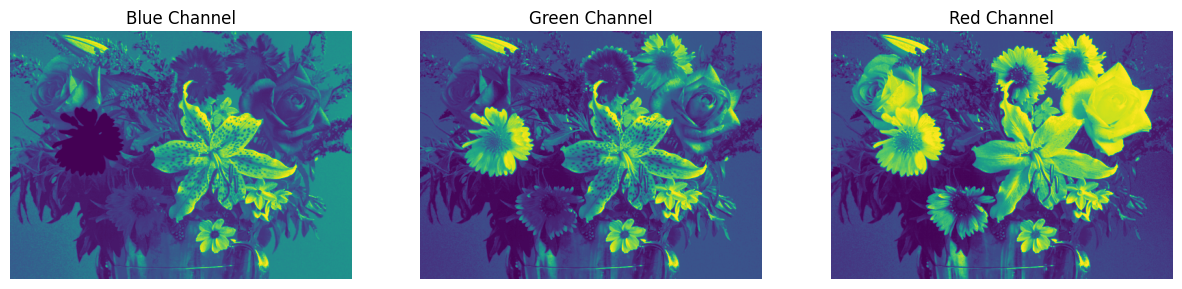

In [4]:
# img[:,:,0] ==> Blue Channel
# img[:,:,1] ==> Green Channel
# img[:,:,2] ==> Red Channel
index_bgr_map = {
  0 : "Blue",
  1 : "Green",
  2 : "Red"
}

_, plots = plt.subplots(ncols=3, nrows=1, figsize=(15, 15))
for i, subplot in zip(range(3), plots):
  img = flowers[:,:,i]
  subplot.set_title("%s Channel" % index_bgr_map[i])
  subplot.imshow(img)
  subplot.set_axis_off()
#plt.show()

   **Approach 2**: Using `cv2.split()`

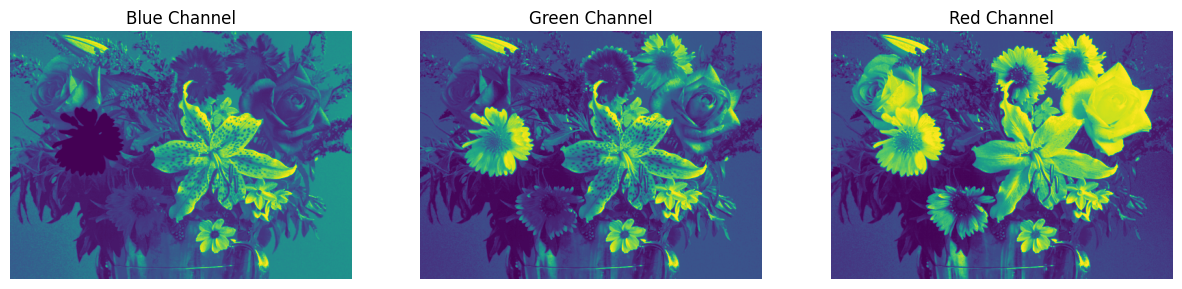

In [5]:
blue, green, red = cv2.split(flowers)
_, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axis[0].set_title("Blue Channel")
axis[0].imshow(blue)
axis[0].set_axis_off()
axis[1].set_title("Green Channel")
axis[1].imshow(green)
axis[1].set_axis_off()
axis[2].set_title("Red Channel")
axis[2].imshow(red)
axis[2].set_axis_off()

### Convert image to HSV and display the three HSV channels

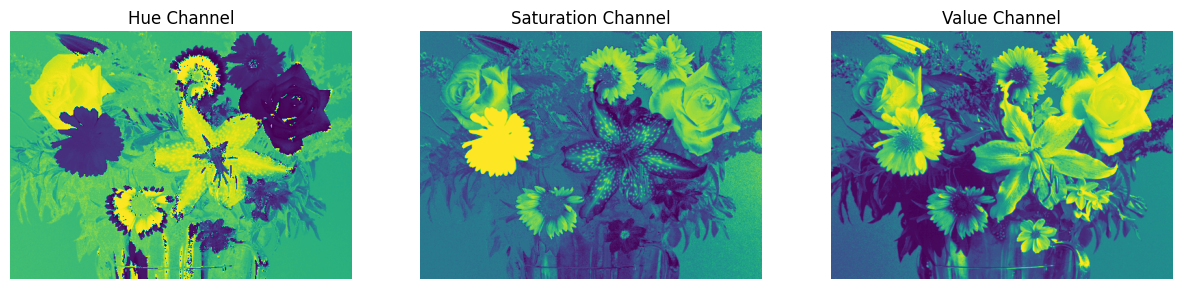

In [6]:
flowers_hsv = cv2.cvtColor(flowers, cv2.COLOR_BGR2HSV)
index_hsv_map = {
  0 : 'Hue',
  1 : 'Saturation',
  2 : 'Value'
}
_, plots = plt.subplots(nrows=1, ncols=3, figsize=FIGSIZE)
for i, plot in zip(range(3), plots):
  img = flowers_hsv[:,:,i]
  plot.set_title("%s Channel" % index_hsv_map[i])
  plot.imshow(img)
  plot.set_axis_off()

### Convert image to Grayscale and display it
**Note:** Grayscaling is the process of converting an image from other color spaces e.g. RGB, CMYK, HSV, etc. to shades of gray. It varies between complete black and complete white. [ref](https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/)

An intuitive way to convert a color image 3D array to a grayscale 2D array is, for each pixel, take the average of the red, green, and blue pixel values to get the grayscale value. [ref](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://e2eml.school/convert_rgb_to_grayscale&ved=2ahUKEwi-hNOh8L2IAxXQ2QIHHSMJBgEQFnoECBkQAw&usg=AOvVaw0pnUZTcSTST7Lw0HUxNlll)

Grayscale image dimensions : (362, 500)


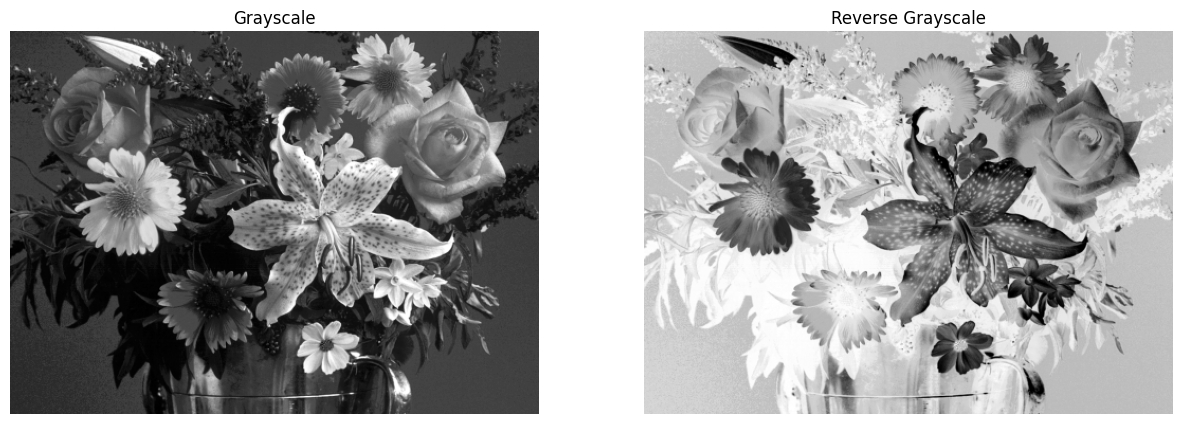

In [7]:
flowers_gray = cv2.cvtColor(flowers, cv2.COLOR_BGR2GRAY)
_, plots = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)
plots[0].set_title("Grayscale")
plots[0].imshow(flowers_gray, cmap='gray')
plots[0].set_axis_off()
plots[1].set_title("Reverse Grayscale")
plots[1].imshow(flowers_gray, cmap='gray_r')
plots[1].set_axis_off()
print(f"Grayscale image dimensions : {flowers_gray.shape}")

### Convert grayscale image to binary

**Approach 1**: Writing our own function

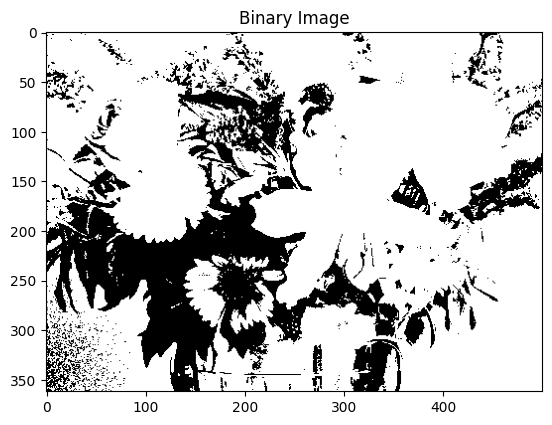

In [8]:
def segment_image(image, threshold):
  dimensions = image.shape
  for r in range(dimensions[0]):
    for c in range(dimensions[1]):
      if image[r][c] <= threshold:
        image[r][c] = 0
      else:
        image[r][c] = 255

flowers_gray_2 = flowers_gray[:,:]
segment_image(flowers_gray_2, 50)
plt.title("Binary Image")
plt.imshow(flowers_gray_2, cmap='gray')

**Apporach 2**: using `cv2.threshold`
 
**Syntax**: `cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)`

**Parameters**: 
- -> source: Input Image array (must be in Grayscale). 
- -> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
- -> maxVal: Maximum value that can be assigned to a pixel. 
- -> thresholdingTechnique: The type of thresholding to be applied. 

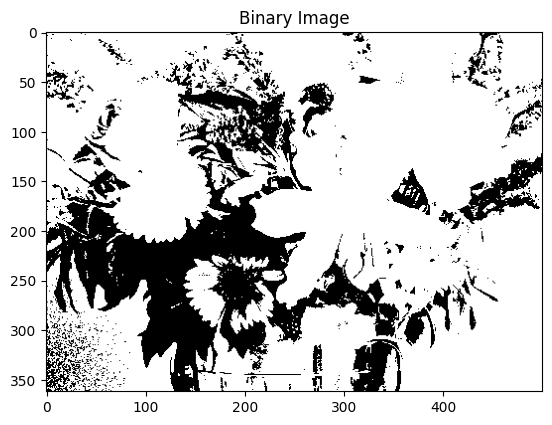

In [9]:
(thresh, im_bw) = cv2.threshold(flowers_gray, 50, 255, cv2.THRESH_BINARY)
plt.title("Binary Image")
plt.imshow(im_bw, cmap='gray')

### Convert grayscale image to binary using Otsu method

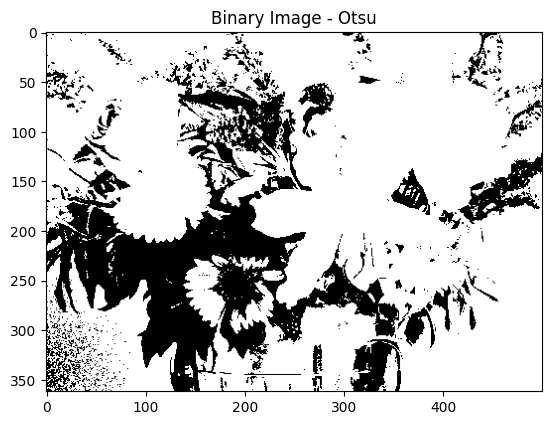

====> Together:


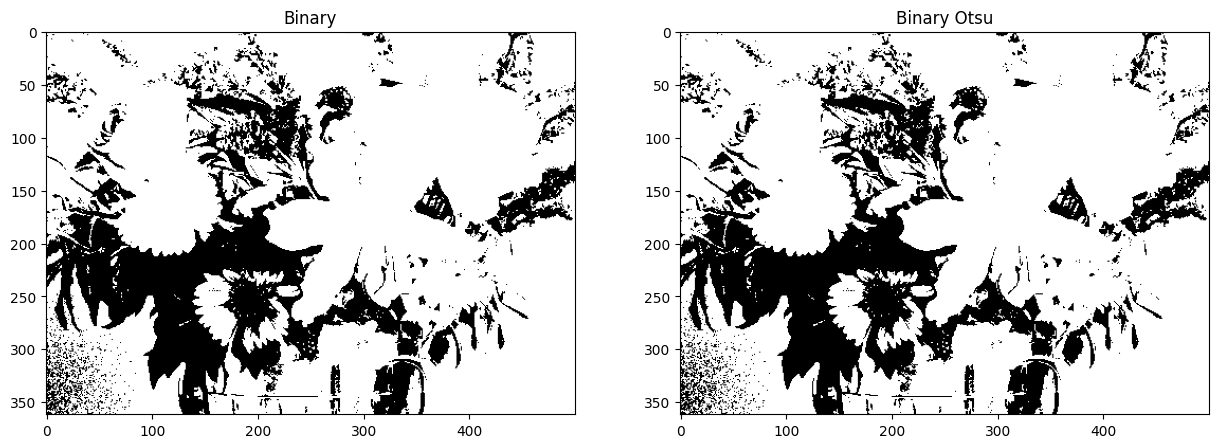

In [16]:
(_, im_bw_otsu) = cv2.threshold(flowers_gray, 10, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.title("Binary Image - Otsu")
plt.imshow(im_bw_otsu, cmap='gray')
plt.show()

print("====> Together:")
_, plots = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)
plots[0].set_title("Binary")
plots[0].imshow(im_bw, cmap='gray')
plots[1].set_title("Binary Otsu")
plots[1].imshow(im_bw_otsu, cmap='gray')

## Part 2: Histogram & Intensity Transformation